In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('air quality data.csv')

In [3]:
df.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,Ahmedabad,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN
1,Ahmedabad,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN
2,Ahmedabad,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN
3,Ahmedabad,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN
4,Ahmedabad,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN


In [4]:
df.tail()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
29526,Visakhapatnam,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0
29527,Visakhapatnam,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0
29528,Visakhapatnam,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0
29529,Visakhapatnam,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0
29530,Visakhapatnam,15.00,66.00,0.40,26.85,14.05,5.20,0.59,2.10,17.05,NaN,NaN,NaN,50.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   City     29531 non-null  object 
 1   PM2.5    24933 non-null  float64
 2   PM10     18391 non-null  float64
 3   NO       25949 non-null  float64
 4   NO2      25946 non-null  float64
 5   NOx      25346 non-null  float64
 6   NH3      19203 non-null  float64
 7   CO       27472 non-null  float64
 8   SO2      25677 non-null  float64
 9   O3       25509 non-null  float64
 10  Benzene  23908 non-null  float64
 11  Toluene  21490 non-null  float64
 12  Xylene   11422 non-null  float64
 13  AQI      24850 non-null  float64
dtypes: float64(13), object(1)
memory usage: 3.2+ MB


In [6]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [7]:
df.isnull().sum()

City           0
PM2.5       4598
PM10       11140
NO          3582
NO2         3585
NOx         4185
NH3        10328
CO          2059
SO2         3854
O3          4022
Benzene     5623
Toluene     8041
Xylene     18109
AQI         4681
dtype: int64

In [8]:
df.isnull().sum().sum()

np.int64(83807)

In [9]:
df.columns

Index(['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI'],
      dtype='object')

In [10]:
df.shape

(29531, 14)

In [11]:
df.duplicated().sum()

np.int64(2297)

In [12]:
df1 = df.dropna(subset=['AQI'], inplace=True)

In [13]:
df.isnull().sum().sort_values(ascending=False)

Xylene     15372
PM10        7086
NH3         6536
Toluene     5826
Benzene     3535
NOx         1857
O3           807
PM2.5        678
SO2          605
CO           445
NO2          391
NO           387
City           0
AQI            0
dtype: int64

In [14]:
df.shape

(24850, 14)

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PM2.5,24172.0,67.476613,63.075398,0.04,29.0000,48.785,80.9250,914.94
PM10,17764.0,118.454435,89.487976,0.03,56.7775,96.180,150.1825,917.08
NO,24463.0,17.622421,22.421138,0.03,5.6600,9.910,20.0300,390.68
NO2,24459.0,28.978391,24.627054,0.01,11.9400,22.100,38.2400,362.21
NOx,22993.0,32.289012,30.712855,0.00,13.1100,23.680,40.1700,378.24
NH3,18314.0,23.848366,25.875981,0.01,8.9600,16.310,30.3600,352.89
CO,24405.0,2.345267,7.075208,0.00,0.5900,0.930,1.4800,175.81
SO2,24245.0,14.362933,17.428693,0.01,5.7300,9.220,15.1400,186.08
O3,24043.0,34.912885,21.724525,0.01,19.2500,31.250,46.0800,257.73
Benzene,21315.0,3.458668,16.036020,0.00,0.2300,1.290,3.3400,455.03


In [16]:
null_values_percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)

In [17]:
null_values_percentage

Xylene     61.859155
PM10       28.515091
NH3        26.301811
Toluene    23.444668
Benzene    14.225352
NOx         7.472837
O3          3.247485
PM2.5       2.728370
SO2         2.434608
CO          1.790744
NO2         1.573441
NO          1.557344
City        0.000000
AQI         0.000000
dtype: float64

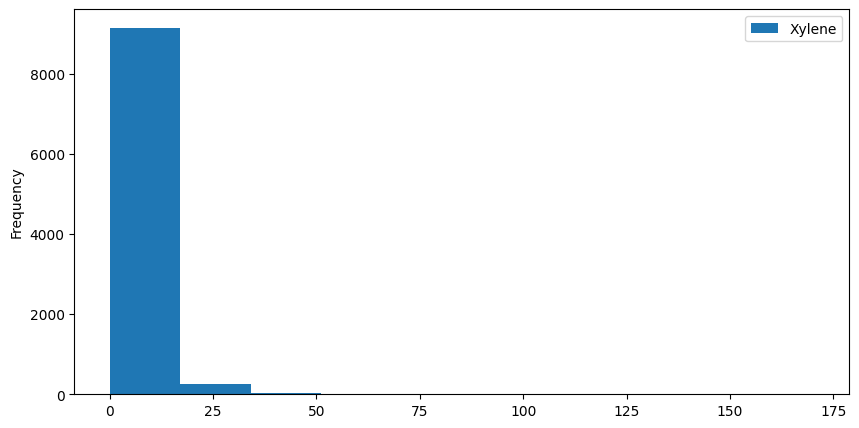

In [18]:
df['Xylene'].plot(kind='hist', figsize=(10, 5))
plt.legend()
plt.show()

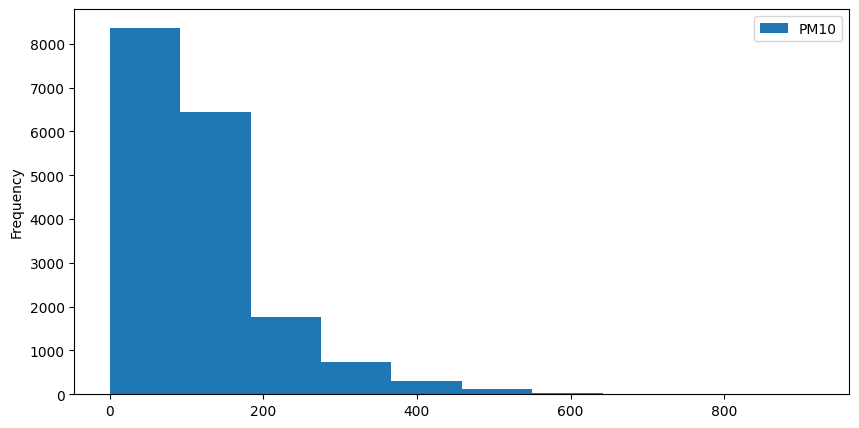

In [19]:
df['PM10'].plot(kind='hist', figsize=(10, 5))
plt.legend()
plt.show()

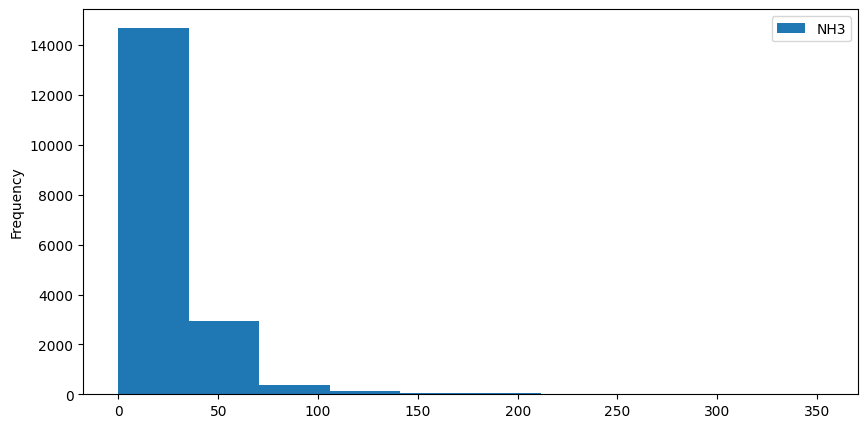

In [20]:
df['NH3'].plot(kind='hist', figsize=(10, 5))
plt.legend()
plt.show()

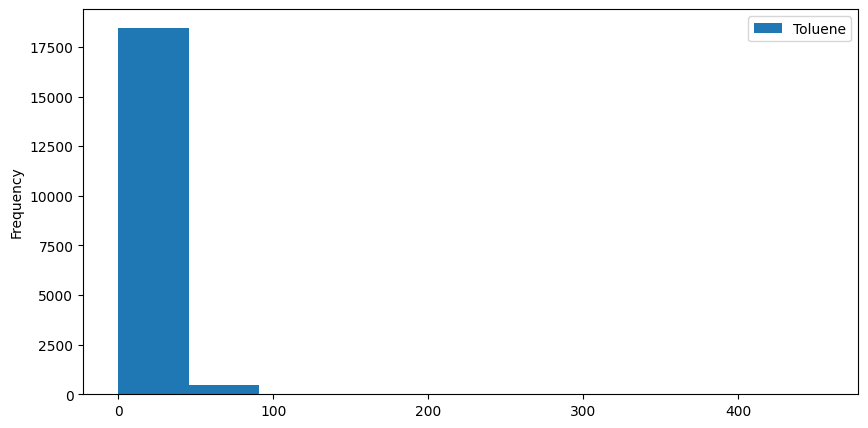

In [21]:
df['Toluene'].plot(kind='hist', figsize=(10, 5))
plt.legend()
plt.show()

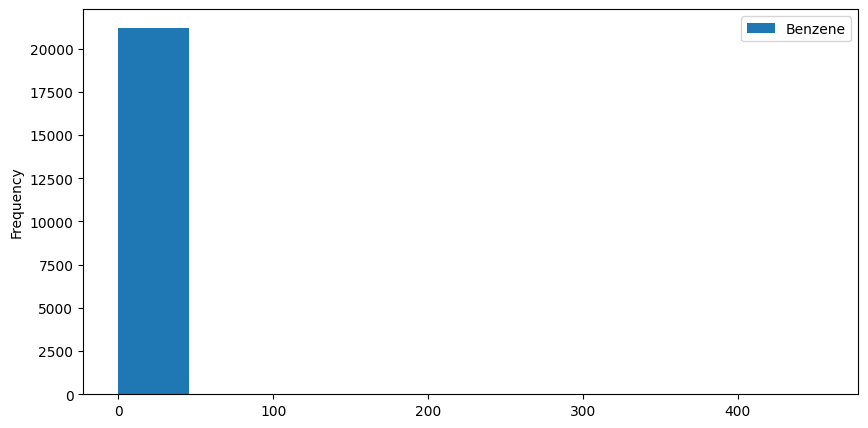

In [22]:
df['Benzene'].plot(kind='hist', figsize=(10, 5))
plt.legend()
plt.show()

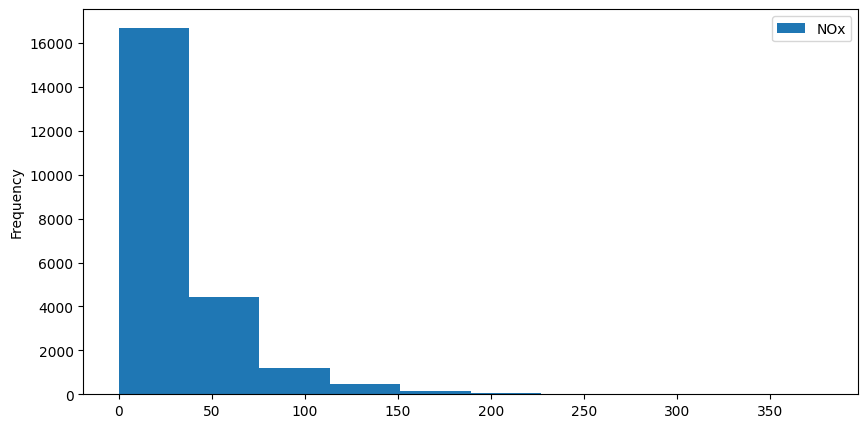

In [23]:
df['NOx'].plot(kind='hist', figsize=(10, 5))
plt.legend()
plt.show()

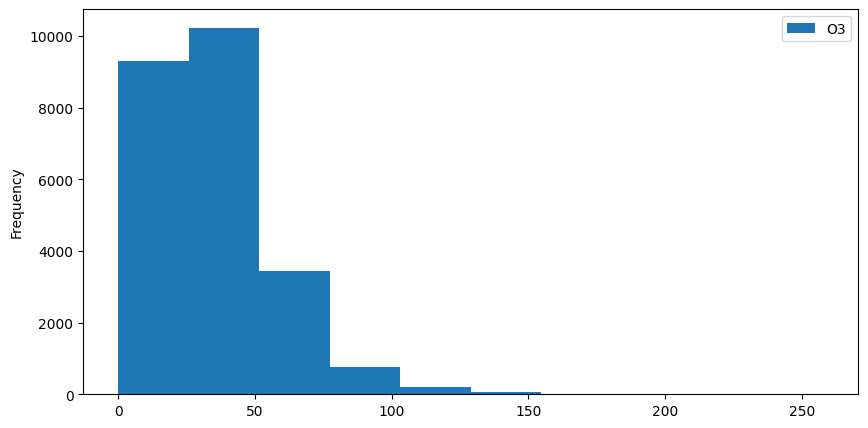

In [24]:
df['O3'].plot(kind='hist', figsize=(10, 5))
plt.legend()
plt.show()

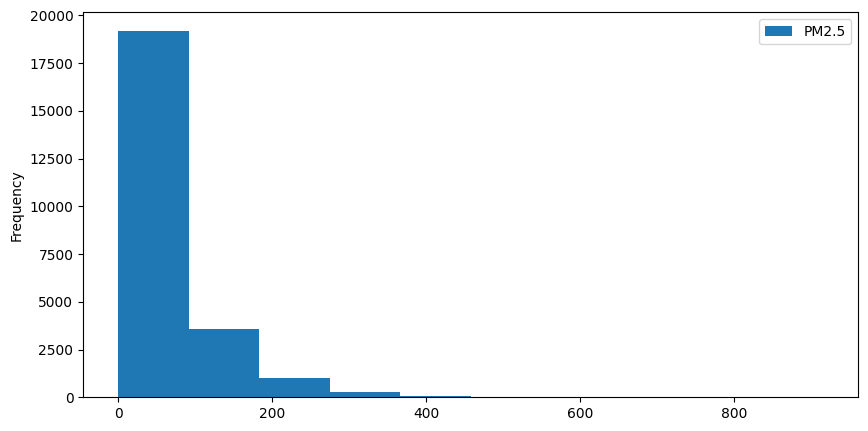

In [25]:
df['PM2.5'].plot(kind='hist', figsize=(10, 5))
plt.legend()
plt.show()

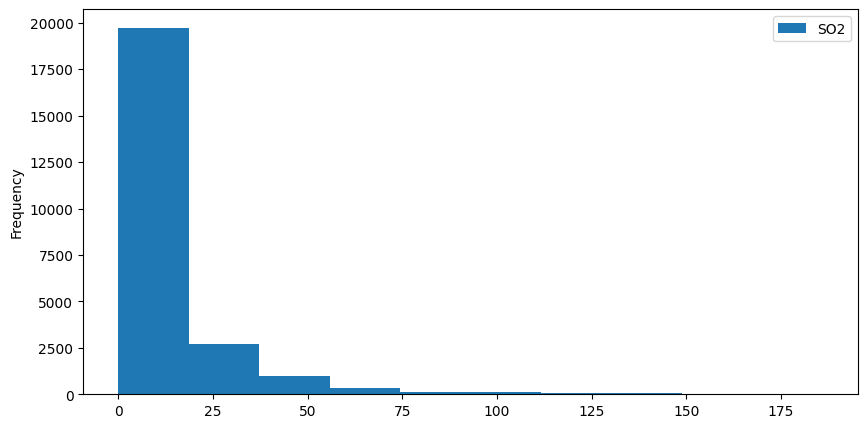

In [26]:
df['SO2'].plot(kind='hist', figsize=(10, 5))
plt.legend()
plt.show()

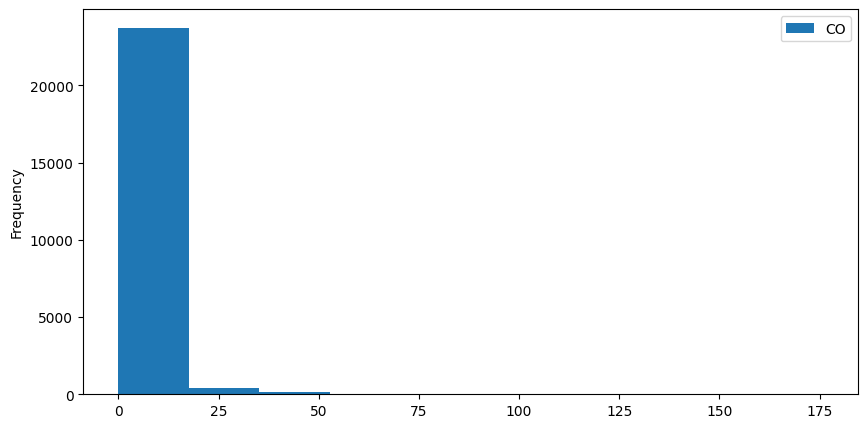

In [27]:
df['CO'].plot(kind='hist', figsize=(10, 5))
plt.legend()
plt.show()

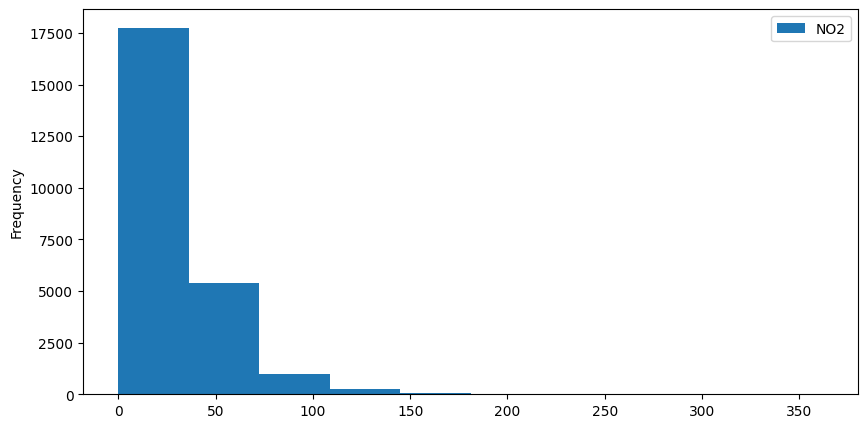

In [28]:
df['NO2'].plot(kind='hist', figsize=(10, 5))
plt.legend()
plt.show()

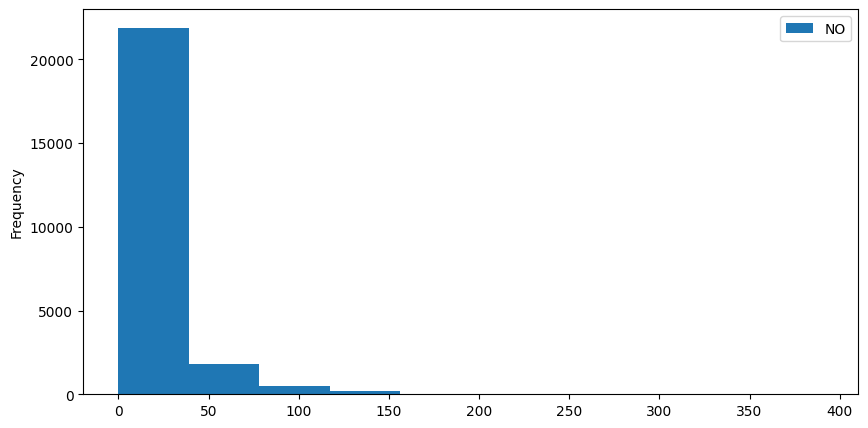

In [29]:
df['NO'].plot(kind='hist', figsize=(10, 5))
plt.legend()
plt.show()

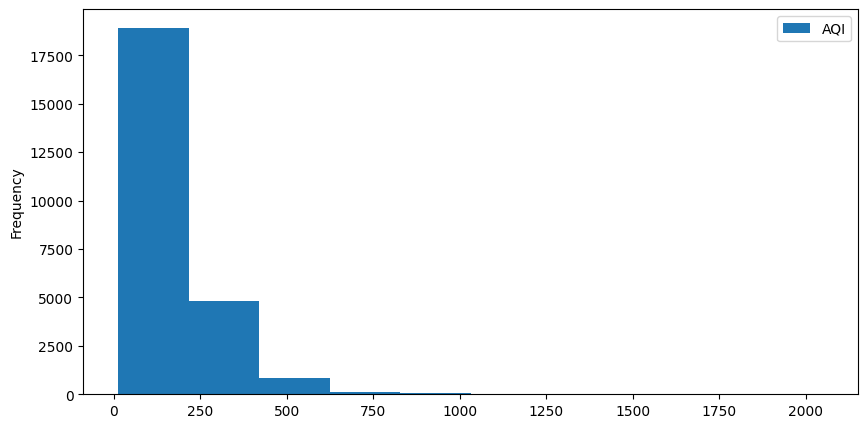

In [30]:
df['AQI'].plot(kind='hist', figsize=(10, 5))
plt.legend()
plt.show()

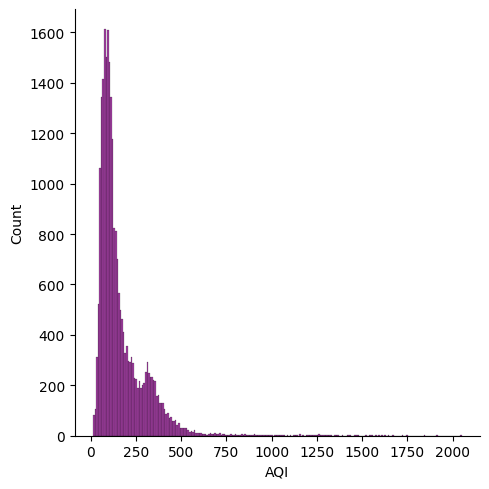

In [31]:
sns.displot(df, x="AQI", color="purple")
plt.show()

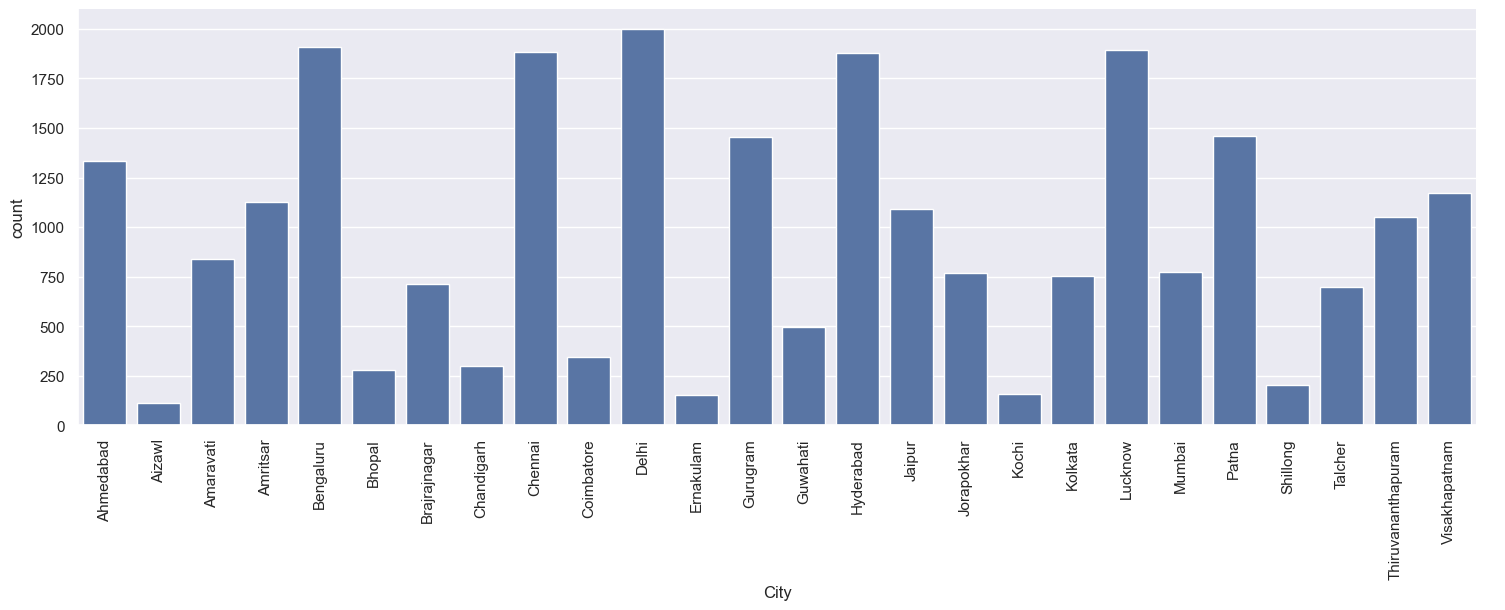

In [32]:
sns.set(style="darkgrid")
graph=sns.catplot(x="City", kind="count", data=df, height=5, aspect=3)
graph.set_xticklabels(rotation=90)

In [33]:
df.describe().loc["std"]

PM2.5       63.075398
PM10        89.487976
NO          22.421138
NO2         24.627054
NOx         30.712855
NH3         25.875981
CO           7.075208
SO2         17.428693
O3          21.724525
Benzene     16.036020
Toluene     20.881085
Xylene       6.754324
AQI        140.696585
Name: std, dtype: float64

In [34]:
df.describe().loc["mean"]

PM2.5       67.476613
PM10       118.454435
NO          17.622421
NO2         28.978391
NOx         32.289012
NH3         23.848366
CO           2.345267
SO2         14.362933
O3          34.912885
Benzene      3.458668
Toluene      9.525714
Xylene       3.588683
AQI        166.463581
Name: mean, dtype: float64

In [35]:
df = df.replace({
    "PM2.5" : {np.nan:67.476613},
    "PM10" : {np.nan:118.454435},
    "NO" : {np.nan:17.622421},
    "NO2" : {np.nan:28.978391},
    "NOx" : {np.nan:32.289012},
    "NH3" : {np.nan:23.848366},
    "CO" : {np.nan:2.345267},
    "SO2" : {np.nan:14.362933},
    "O3" : {np.nan:34.912885},
    "Benzene" : {np.nan:3.458668},
    "Toluene" : {np.nan:9.525714},
    "Xylene" : {np.nan:3.588683},
    "AQI" : {np.nan:166.463581},
})

In [36]:
df.isnull().sum()

City       0
PM2.5      0
PM10       0
NO         0
NO2        0
NOx        0
NH3        0
CO         0
SO2        0
O3         0
Benzene    0
Toluene    0
Xylene     0
AQI        0
dtype: int64

In [37]:
df.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
28,Ahmedabad,83.13,118.454435,6.93,28.71,33.72,23.848366,6.93,49.52,59.76,0.02,0.00,3.14,209.0
29,Ahmedabad,79.84,118.454435,13.85,28.68,41.08,23.848366,13.85,48.49,97.07,0.04,0.00,4.81,328.0
30,Ahmedabad,94.52,118.454435,24.39,32.66,52.61,23.848366,24.39,67.39,111.33,0.24,0.01,7.67,514.0
31,Ahmedabad,135.99,118.454435,43.48,42.08,84.57,23.848366,43.48,75.23,102.70,0.40,0.04,25.87,782.0
32,Ahmedabad,178.33,118.454435,54.56,35.31,72.80,23.848366,54.56,55.04,107.38,0.46,0.06,35.61,914.0


<Axes: >

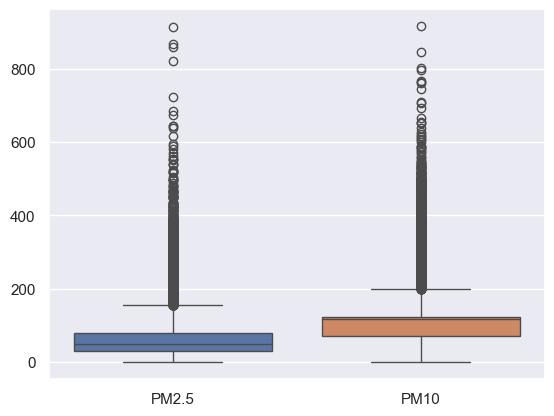

In [38]:
sns.boxplot(data=df[['PM2.5', 'PM10']])

<Axes: >

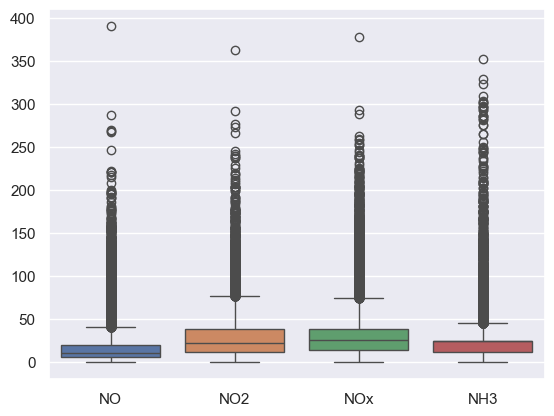

In [39]:
sns.boxplot(data=df[['NO', 'NO2', 'NOx', 'NH3']])

<Axes: >

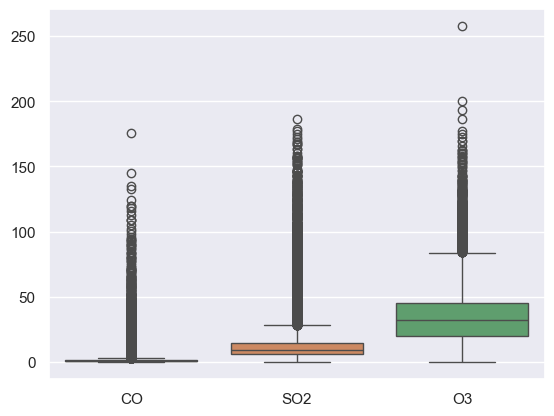

In [40]:
sns.boxplot(data=df[['CO', 'SO2', 'O3']])

<Axes: >

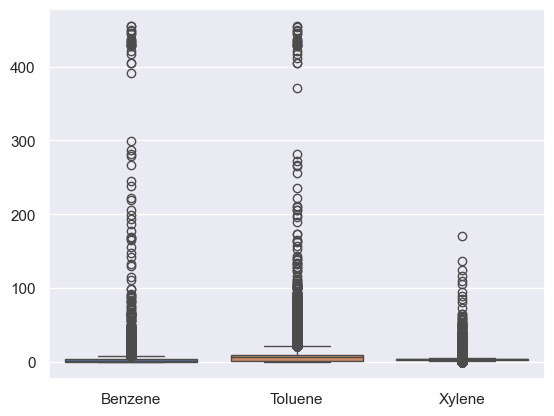

In [41]:
sns.boxplot(data=df[['Benzene', 'Toluene', 'Xylene']])

<Axes: >

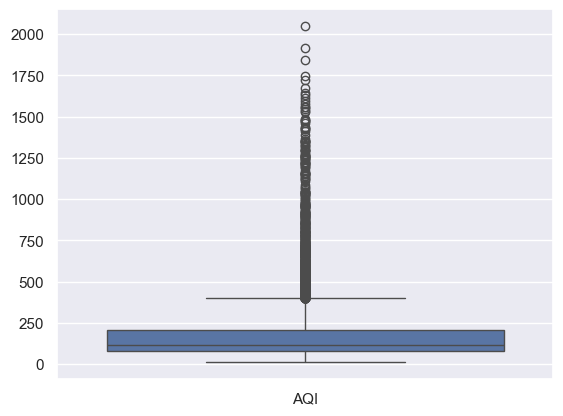

In [42]:
sns.boxplot(data=df[['AQI']])

In [43]:
def replace_outliers_with_quartiles(df):
    for column in df.select_dtypes(include=['number']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df[column] = df[column].apply(
            lambda x: Q1 if x < lower_bound else (Q3 if x > upper_bound else x)
        )

    return df

df = replace_outliers_with_quartiles(df)

<Axes: >

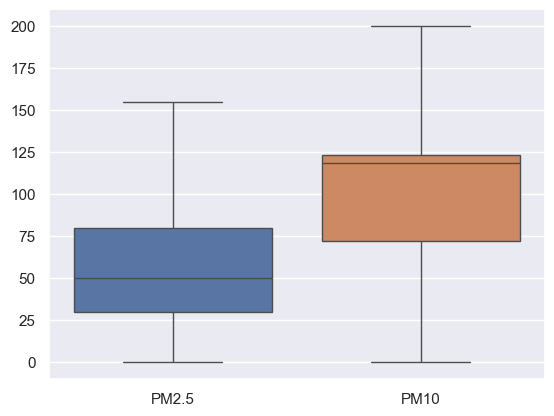

In [44]:
sns.boxplot(data=df[['PM2.5','PM10']])

<Axes: >

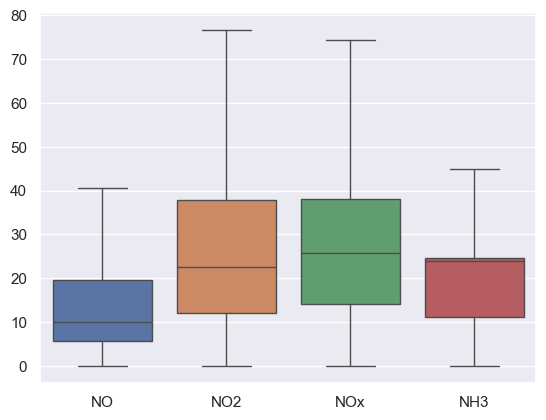

In [45]:
sns.boxplot(data=df[['NO','NO2', 'NOx', 'NH3']])

<Axes: >

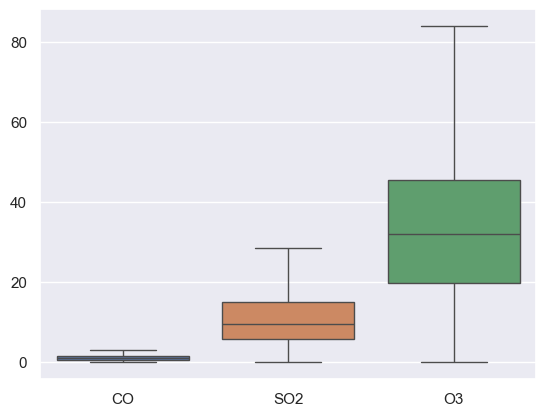

In [48]:
sns.boxplot(data=df[['CO', 'SO2', 'O3']])

<Axes: >

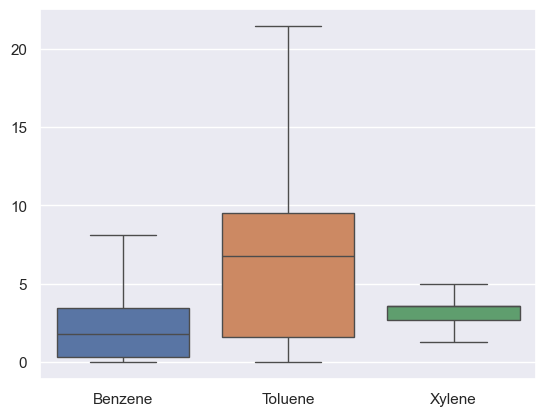

In [49]:
sns.boxplot(data=df[['Benzene','Toluene', 'Xylene']])

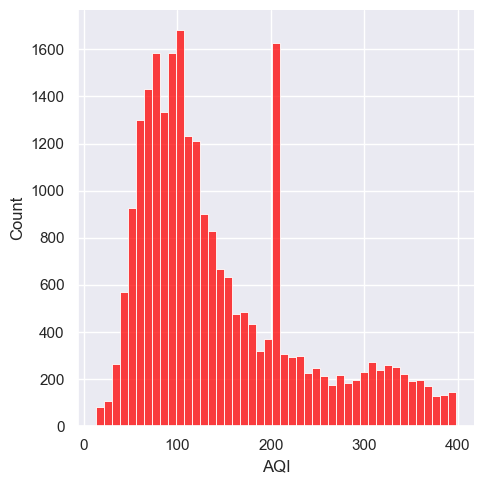

In [50]:
sns.displot(df, x="AQI", color="red")
plt.show()

In [51]:
df1=df.drop(columns=['City'])

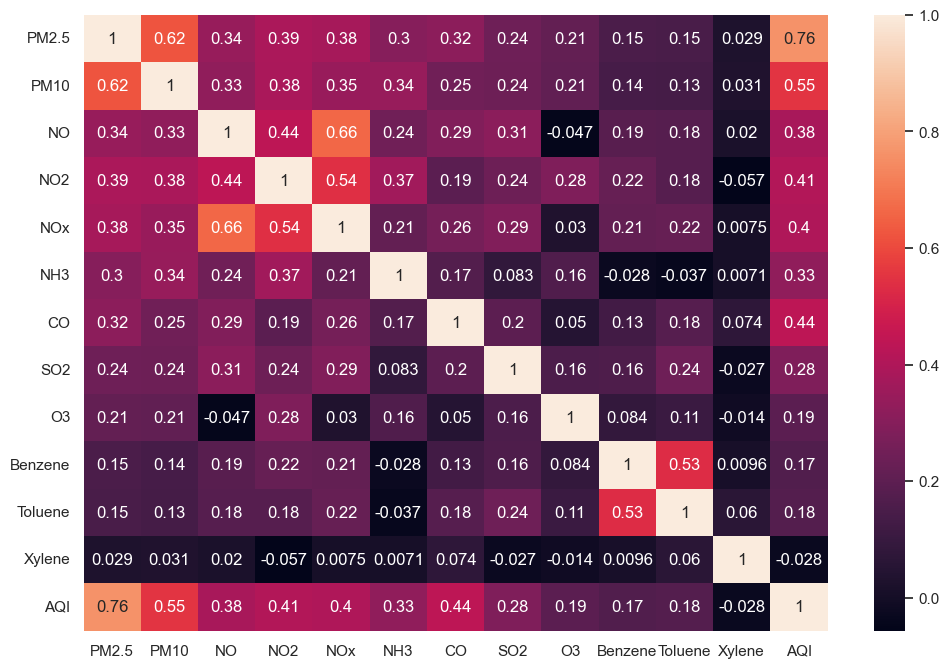

In [52]:
plt.figure(figsize=(12, 8))
sns.heatmap(df1.corr(), annot=True)
plt.show()

In [53]:
df

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
28,Ahmedabad,83.1300,118.454435,6.93,28.71,33.72,23.848366,1.53,14.89,59.7600,0.020000,0.000000,3.140000,209.0
29,Ahmedabad,79.8400,118.454435,13.85,28.68,41.08,23.848366,1.53,14.89,45.3975,0.040000,0.000000,4.810000,328.0
30,Ahmedabad,94.5200,118.454435,24.39,32.66,52.61,23.848366,1.53,14.89,45.3975,0.240000,0.010000,3.588683,208.0
31,Ahmedabad,135.9900,118.454435,19.71,42.08,38.17,23.848366,1.53,14.89,45.3975,0.400000,0.040000,3.588683,208.0
32,Ahmedabad,79.5075,118.454435,19.71,35.31,72.80,23.848366,1.53,14.89,45.3975,0.460000,0.060000,3.588683,208.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,15.0200,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.3000,2.240000,12.070000,2.650000,41.0
29527,Visakhapatnam,24.3800,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.1400,0.740000,2.210000,2.650000,70.0
29528,Visakhapatnam,22.9100,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.9600,0.010000,0.010000,2.650000,68.0
29529,Visakhapatnam,16.6400,49.970000,4.05,29.26,18.80,10.030000,0.52,9.84,28.3000,0.000000,0.000000,2.650000,54.0


In [54]:
df.drop(['City'], axis=1, inplace=True)

In [55]:
df.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
28,83.1300,118.454435,6.93,28.71,33.72,23.848366,1.53,14.89,59.7600,0.02,0.00,3.140000,209.0
29,79.8400,118.454435,13.85,28.68,41.08,23.848366,1.53,14.89,45.3975,0.04,0.00,4.810000,328.0
30,94.5200,118.454435,24.39,32.66,52.61,23.848366,1.53,14.89,45.3975,0.24,0.01,3.588683,208.0
31,135.9900,118.454435,19.71,42.08,38.17,23.848366,1.53,14.89,45.3975,0.40,0.04,3.588683,208.0
32,79.5075,118.454435,19.71,35.31,72.80,23.848366,1.53,14.89,45.3975,0.46,0.06,3.588683,208.0


In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [58]:
x=df[["PM2.5","PM10","NO","NO2","NOx","NH3","CO","SO2","O3","Benzene","Toluene","Xylene"]]
y=df["AQI"]

In [59]:
x.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
28,83.1300,118.454435,6.93,28.71,33.72,23.848366,1.53,14.89,59.7600,0.02,0.00,3.140000
29,79.8400,118.454435,13.85,28.68,41.08,23.848366,1.53,14.89,45.3975,0.04,0.00,4.810000
30,94.5200,118.454435,24.39,32.66,52.61,23.848366,1.53,14.89,45.3975,0.24,0.01,3.588683
31,135.9900,118.454435,19.71,42.08,38.17,23.848366,1.53,14.89,45.3975,0.40,0.04,3.588683
32,79.5075,118.454435,19.71,35.31,72.80,23.848366,1.53,14.89,45.3975,0.46,0.06,3.588683


In [60]:
y.head()

28    209.0
29    328.0
30    208.0
31    208.0
32    208.0
Name: AQI, dtype: float64

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=70)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(19880, 12) (4970, 12) (19880,) (4970,)


In [79]:
#Linear Regression
model=LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [80]:
train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

In [81]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(y_train, train_pred)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(y_test, test_pred)))
print("RMSE TrainingData = ", str(RMSE_train))
print("RMSE TestData = ", str(RMSE_test))
print('-'*50)
print("RSquared value on train:", model.score(x_train, y_train))
print("RSquared value on test:", model.score(x_test, y_test))

RMSE TrainingData =  51.70703411023219
RMSE TestData =  50.98891707971116
--------------------------------------------------
RSquared value on train: 0.6510670631277098
RSquared value on test: 0.6561645891946594


In [82]:
#KNN Model
KNN = KNeighborsRegressor()
KNN.fit(x_train, y_train)

KNeighborsRegressor()

In [83]:
train_pred=KNN.predict(x_train)
test_pred=KNN.predict(x_test)

In [84]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(y_train, train_pred)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(y_test, test_pred)))
print("RMSE TrainingData = ", str(RMSE_train))
print("RMSE TestData = ", str(RMSE_test))
print('-'*50)
print("RSquared value on train:", KNN.score(x_train, y_train))
print("RSquared value on test:", KNN.score(x_test, y_test))

RMSE TrainingData =  35.55480888160764
RMSE TestData =  42.64846856837141
--------------------------------------------------
RSquared value on train: 0.8350169197435091
RSquared value on test: 0.759449697735837


In [85]:
#Decision Tree
DT=DecisionTreeRegressor()
DT.fit(x_train, y_train)

DecisionTreeRegressor()

In [86]:
train_preds=DT.predict(x_train)
test_preds=DT.predict(x_test)

In [87]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(y_train, train_pred)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(y_test, test_pred)))
print("RMSE TrainingData = ", str(RMSE_train))
print("RMSE TestData = ", str(RMSE_test))
print('-'*50)
print("RSquared value on train:", DT.score(x_train, y_train))
print("RSquared value on test:", DT.score(x_test, y_test))

RMSE TrainingData =  35.55480888160764
RMSE TestData =  42.64846856837141
--------------------------------------------------
RSquared value on train: 0.9991056471481347
RSquared value on test: 0.7133528565716333


In [88]:
#Random Forest
RF=RandomForestRegressor()
RF.fit(x_train, y_train)

RandomForestRegressor()

In [89]:
train_preds=RF.predict(x_train)
test_preds=RF.predict(x_test)

In [90]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(y_train, train_pred)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(y_test, test_pred)))
print("RMSE TrainingData = ", str(RMSE_train))
print("RMSE TestData = ", str(RMSE_test))
print('-'*50)
print("RSquared value on train:", RF.score(x_train, y_train))
print("RSquared value on test:", RF.score(x_test, y_test))

RMSE TrainingData =  35.55480888160764
RMSE TestData =  42.64846856837141
--------------------------------------------------
RSquared value on train: 0.9774247789452576
RSquared value on test: 0.8506631043544772
